In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

from tensorflow.keras import models
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")



,timestamp,MQ136_CO,MQ136_H2S,MQ136_NH4,MQ2_Alc,MQ2_CO,MQ2_H2,MQ2_LPG,MQ2_Prop,MQ3_Alc,MQ3_Ben,MQ3_CH4,MQ3_CO,MQ3_Hex,MQ3_LPG
0,1682089525,5318.23,325.00,453.26,52.85,285.72,30.79,16.98,21.65,0.242456,2.039812,402.45,132.78,3071.24,270.88
1,1682089526,15481.35,865.08,910.13,81.53,447.35,44.22,23.85,30.36,0.287120,2.745789,552.55,188.27,4231.60,351.05
2,1682089527,33282.73,1765.11,1498.42,120.35,754.76,61.29,33.14,42.64,0.322711,3.427850,675.21,244.63,5319.82,426.62
3,1682089528,41759.34,2275.62,1799.59,151.25,958.53,72.42,40.87,49.70,0.325958,3.738615,764.57,268.36,5912.26,455.27
4,1682089529,55179.24,3027.17,2194.09,255.54,1788.28,110.05,61.57,76.49,0.372978,4.443688,916.14,342.01,6980.70,528.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184004,1683306126,263.13,19.69,64.73,28.73,132.58,19.87,10.38,12.98,0.153980,0.905993,178.67,52.92,1286.80,142.55
1184005,1683306127,263.63,19.79,64.08,28.62,131.13,19.24,10.31,13.06,0.153980,0.917940,178.19,53.40,1281.43,141.77
1184006,1683306128,261.62,19.79,64.41,28.30,134.04,19.57,10.36,12.77,0.154207,0.909561,177.94,54.39,1286.80,141.93
1184007,1683306129,262.62,19.93,64.32,28.40,132.00,19.63,10.26,13.06,0.155917,0.893028,179.65,53.08,1269.00,142.55


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
# Assuming the data is stored in a CSV file, load it into a pandas DataFrame
data = pd.read_csv('data4.csv')
data = data[:31276]

# Extract the input features (excluding 'timestamp' and 'MQ136_CO')
X = data.drop(columns=['timestamp', 'MQ136_CO']).values

# Extract the target variable 'MQ136_CO' as the labels
y = data['MQ136_CO'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [7]:
num_epochs = 100
batch_size = 32
history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/100
704/704 [==============================] - 1s 1ms/step - loss: 5152857.0000 - val_loss: 1051450.7500
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 824725.3750 - val_loss: 537839.5000
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 531959.6875 - val_loss: 376191.7812
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 370964.5000 - val_loss: 228980.1094
Epoch 5/100
704/704 [==============================] - 1s 954us/step - loss: 270064.7188 - val_loss: 187627.6719
Epoch 6/100
704/704 [==============================] - 1s 996us/step - loss: 201201.0781 - val_loss: 156499.9219
Epoch 7/100
704/704 [==============================] - 1s 921us/step - loss: 161791.2812 - val_loss: 134593.2031
Epoch 8/100
704/704 [==============================] - 1s 909us/step - loss: 137109.0469 - val_loss: 121065.6328
Epoch 9/100
704/704 [==============================] - 1s 944us/step - loss: 123548.9688 - val_loss: 1

704/704 [==============================] - 1s 1ms/step - loss: 29600.6699 - val_loss: 18724.5469
Epoch 75/100
704/704 [==============================] - 1s 1ms/step - loss: 27701.9961 - val_loss: 17415.9043
Epoch 76/100
704/704 [==============================] - 1s 983us/step - loss: 26568.4668 - val_loss: 27208.8418
Epoch 77/100
704/704 [==============================] - 1s 988us/step - loss: 27869.2070 - val_loss: 25345.9219
Epoch 78/100
704/704 [==============================] - 1s 1ms/step - loss: 28270.1934 - val_loss: 22108.0469
Epoch 79/100
704/704 [==============================] - 1s 911us/step - loss: 28131.3164 - val_loss: 17481.0879
Epoch 80/100
704/704 [==============================] - 1s 993us/step - loss: 26645.5059 - val_loss: 18183.1152
Epoch 81/100
704/704 [==============================] - 1s 1ms/step - loss: 26932.0176 - val_loss: 17574.3477
Epoch 82/100
704/704 [==============================] - 1s 907us/step - loss: 26818.6328 - val_loss: 19009.5176
Epoch 83/100


In [8]:
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss: {:.2f}".format(test_loss))


196/196 [==============================] - 0s 1ms/step - loss: 19077.4258
Test loss: 19077.43


In [9]:
# Assuming you have a new data point for prediction
new_data = np.array([[865.08, 910.13, 81.53, 447.35, 44.22, 23.85, 30.36, 0.287120, 2.745789, 552.55, 188.27, 4231.60, 351.05]])

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained model
predicted_concentration = model.predict(new_data_scaled)

print("Predicted MQ136_CO concentration: {:.2f}".format(predicted_concentration[0][0]))


1/1 [==============================] - 0s 70ms/step
Predicted MQ136_CO concentration: 16189.71


In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv('data4.csv')
df = data[:31276]

# Preprocess the data
df = df.drop('timestamp', axis=1)
X = df.drop('MQ136_H2S', axis=1)
y = df['MQ136_H2S']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
test_predictions = model.predict(X_test_scaled)
mse = mean_squared_error(test_predictions, y_test)
mae = mean_absolute_error(test_predictions, y_test)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Compare with Linear Regression
model_multi = LinearRegression().fit(X_train_scaled, y_train)
linear_test_prediction = model_multi.predict(X_test_scaled)
mse_linear = mean_squared_error(linear_test_prediction, y_test)
mae_linear = mean_absolute_error(linear_test_prediction, y_test)
rmse_linear = np.sqrt(mse_linear)
print("\nLinear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)


Epoch 1/100
2002/2002 [==============================] - 5s 1ms/step - loss: 2309.3342 - mean_absolute_error: 15.0744 - mean_squared_error: 2309.3342 - val_loss: 1391.8419 - val_mean_absolute_error: 13.2909 - val_mean_squared_error: 1391.8419
Epoch 2/100
2002/2002 [==============================] - 3s 1ms/step - loss: 354.3075 - mean_absolute_error: 6.6027 - mean_squared_error: 354.3075 - val_loss: 102.4357 - val_mean_absolute_error: 4.8388 - val_mean_squared_error: 102.4357
Epoch 3/100
2002/2002 [==============================] - 2s 1ms/step - loss: 269.3313 - mean_absolute_error: 6.2229 - mean_squared_error: 269.3313 - val_loss: 105.8843 - val_mean_absolute_error: 3.9827 - val_mean_squared_error: 105.8843
Epoch 4/100
2002/2002 [==============================] - 2s 1ms/step - loss: 215.1961 - mean_absolute_error: 5.4378 - mean_squared_error: 215.1961 - val_loss: 2451.0935 - val_mean_absolute_error: 16.7120 - val_mean_squared_error: 2451.0935
Epoch 5/100
2002/2002 [====================

2002/2002 [==============================] - 3s 1ms/step - loss: 124.5192 - mean_absolute_error: 3.9026 - mean_squared_error: 124.5192 - val_loss: 92.4869 - val_mean_absolute_error: 3.1673 - val_mean_squared_error: 92.4869
Epoch 36/100
2002/2002 [==============================] - 2s 1ms/step - loss: 127.8518 - mean_absolute_error: 4.2531 - mean_squared_error: 127.8518 - val_loss: 670.3236 - val_mean_absolute_error: 4.1141 - val_mean_squared_error: 670.3236
Epoch 37/100
2002/2002 [==============================] - 2s 1ms/step - loss: 232.7580 - mean_absolute_error: 4.9287 - mean_squared_error: 232.7580 - val_loss: 72.7001 - val_mean_absolute_error: 3.3568 - val_mean_squared_error: 72.7001
Epoch 38/100
2002/2002 [==============================] - 2s 1ms/step - loss: 143.8063 - mean_absolute_error: 4.0949 - mean_squared_error: 143.8063 - val_loss: 106.4853 - val_mean_absolute_error: 3.2706 - val_mean_squared_error: 106.4853
Epoch 39/100
2002/2002 [==============================] - 2s 1ms/

Epoch 70/100
2002/2002 [==============================] - 2s 1ms/step - loss: 159.2843 - mean_absolute_error: 3.9919 - mean_squared_error: 159.2843 - val_loss: 80.2807 - val_mean_absolute_error: 3.2949 - val_mean_squared_error: 80.2807
Epoch 71/100
2002/2002 [==============================] - 2s 1ms/step - loss: 149.7096 - mean_absolute_error: 3.8642 - mean_squared_error: 149.7096 - val_loss: 110.7206 - val_mean_absolute_error: 3.2313 - val_mean_squared_error: 110.7206
Epoch 72/100
2002/2002 [==============================] - 2s 1ms/step - loss: 119.1117 - mean_absolute_error: 3.6093 - mean_squared_error: 119.1117 - val_loss: 160.4910 - val_mean_absolute_error: 3.3841 - val_mean_squared_error: 160.4910
Epoch 73/100
2002/2002 [==============================] - 2s 1ms/step - loss: 150.4080 - mean_absolute_error: 4.2191 - mean_squared_error: 150.4080 - val_loss: 162.7778 - val_mean_absolute_error: 3.4348 - val_mean_squared_error: 162.7778
Epoch 74/100
2002/2002 [==========================

In [11]:
# Create a dictionary to store the results
results = {
    'Model': ['ANN', 'Linear Regression'],
    'MSE': [mse, mse_linear],
    'MAE': [mae, mae_linear],
    'RMSE': [rmse, rmse_linear]
}

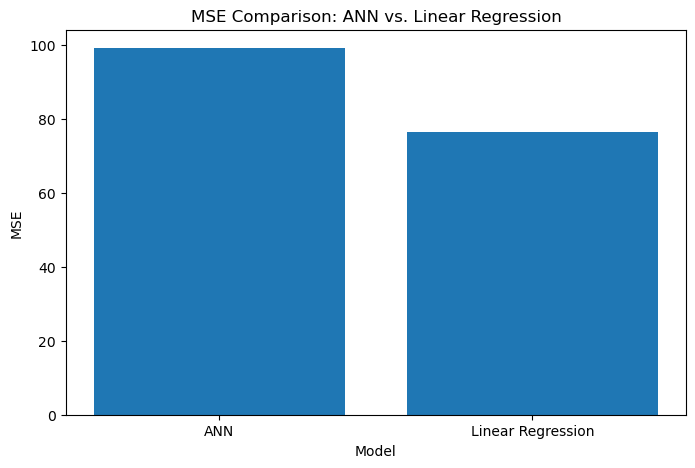

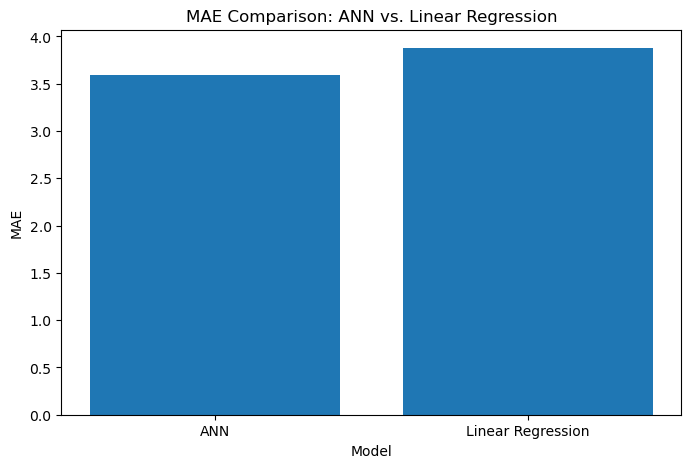

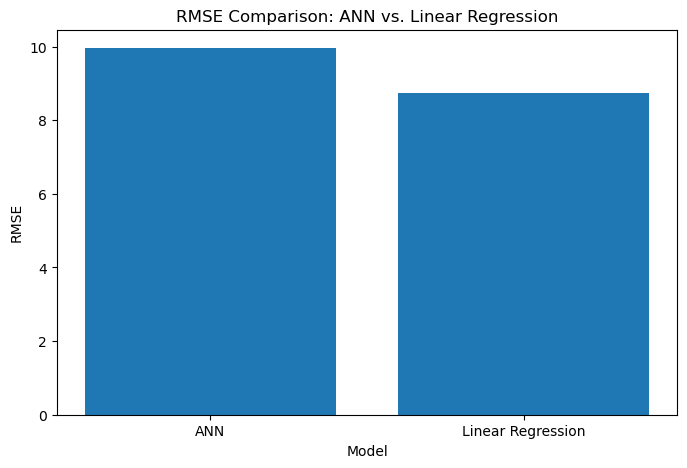

In [12]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Plot the comparison graph
metrics = ['MSE', 'MAE', 'RMSE']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(results_df['Model'], results_df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison: ANN vs. Linear Regression')
    plt.show()